In [1]:
# importing of modules for CIFAR-100 CNN
from tensorflow.keras.datasets import cifar100
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print('Libraries imported.')

Libraries imported.


In [2]:
#training constants
BATCH_SIZE = 32
LEARNING_RATE = 0.001
DROPOUT = 0.5

N_EPOCH = 100
N_CLASSES = 100
VERBOSE = 0
VALIDATION_SPLIT = 0.2

print('Main variables initialised.')

Main variables initialised.


In [3]:
# CIFAR_100 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

print('Image variables initialisation')

Image variables initialisation


In [4]:
#load dataset
(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar100.load_data()
print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')

# convert to categorical
output_Y_train = utils.to_categorical(output_y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_y_test, N_CLASSES)

# float and normalization
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step
input_X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Sample input image: [[[0.98039216 0.98039216 0.972549  ]
  [0.972549   0.9764706  0.9529412 ]
  [0.96862745 0.972549   0.9372549 ]
  ...
  [0.98039216 0.98039216 0.9647059 ]
  [0.98039216 0.98039216 0.9647059 ]
  [0.9764706  0.98039216 0.9647059 ]]

 [[0.98039216 0.9843137  0.9607843 ]
  [0.972549   0.9764706  0.93333334]
  [0.96862745 0.96862745 0.91764706]
  ...
  [0.9843137  0.9843137  0.9490196 ]
  [0.9843137  0.9882353  0.9529412 ]
  [0.98039216 0.9843137  0.9529412 ]]

 [[0.9843137  0.9843137  0.95686275]
  [0.98039216 0.972549   0.92941177]
  [0.98039216 0.9607843  0.9137255 ]
  ...
  [0.98039216 0.9764706  0.93333334]
  [0.98039216 0.9764706  0.9411765 ]
  [0.98039216 0.9764706  0.9490196 ]]

 ...

 [[0.8666667  0.8352941  0.7490196 ]
  [0.8666667  0.80784315 0.6901961 ]
  [0.88235295 0.8117647  0.70980394]
  ...
  [0.78039217 0.6901961  0.5254902 ]
  [0.8117647  0.75686276 0.64705884]
  [0.9137255  0.8980392  0.8862745 ]]

 [[0.88235295 0.8745098  0.8       ]
  [0.8901961  0.8

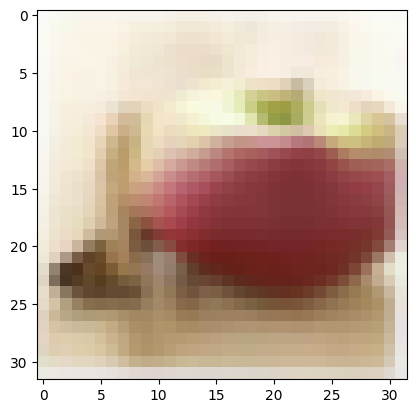

Sample input image: [[[0.4862745  0.7607843  0.8666667 ]
  [0.5137255  0.7921569  0.89411765]
  [0.5294118  0.80784315 0.89411765]
  ...
  [0.58431375 0.88235295 0.9254902 ]
  [0.56078434 0.8627451  0.91764706]
  [0.53333336 0.8352941  0.9019608 ]]

 [[0.4745098  0.7607843  0.8627451 ]
  [0.5019608  0.7882353  0.88235295]
  [0.5254902  0.80784315 0.89411765]
  ...
  [0.5921569  0.8784314  0.91764706]
  [0.57254905 0.87058824 0.91764706]
  [0.5568628  0.8509804  0.9098039 ]]

 [[0.47843137 0.77254903 0.8745098 ]
  [0.5058824  0.8        0.89411765]
  [0.53333336 0.8156863  0.8980392 ]
  ...
  [0.6117647  0.89411765 0.9254902 ]
  [0.6        0.8862745  0.92941177]
  [0.5803922  0.8666667  0.92156863]]

 ...

 [[0.5058824  0.16470589 0.23137255]
  [0.5764706  0.06666667 0.14901961]
  [0.5921569  0.0627451  0.11764706]
  ...
  [0.91764706 0.90588236 0.88235295]
  [0.93333334 0.9411765  0.9137255 ]
  [0.8784314  0.77254903 0.7882353 ]]

 [[0.5882353  0.08235294 0.15686275]
  [0.59607846 0.0

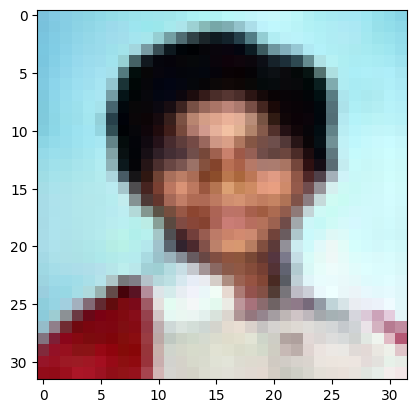

In [5]:
# visualisation of the numerical vector and 2D colour plot of the sample CIFAR imnage 2
Selected_Image = 2
image = input_X_train[Selected_Image]
print ("Sample input image: " + str(image))
plt.imshow(image)
plt.show()

Selected_Image = 3
image = input_X_train[Selected_Image]
print ("Sample input image: " + str(image))
plt.imshow(image)
plt.show()

In [6]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_CLASSES, activation='softmax'))
    
    
optim = SGD(learning_rate=LEARNING_RATE, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │              

 Total params: 2,217,348 (8.46 MB)

 Trainable params: 2,215,940 (8.45 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [7]:
# training/fitting of the complex DNN model
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

history = model.fit(
    input_X_train, output_Y_train,
    batch_size=BATCH_SIZE,
    epochs=N_EPOCH,
    validation_split=VALIDATION_SPLIT,
    verbose=VERBOSE,
    callbacks=[early_stopping]
)


Test score/loss: 1.7466707229614258
Test accuracy: 0.531000018119812
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


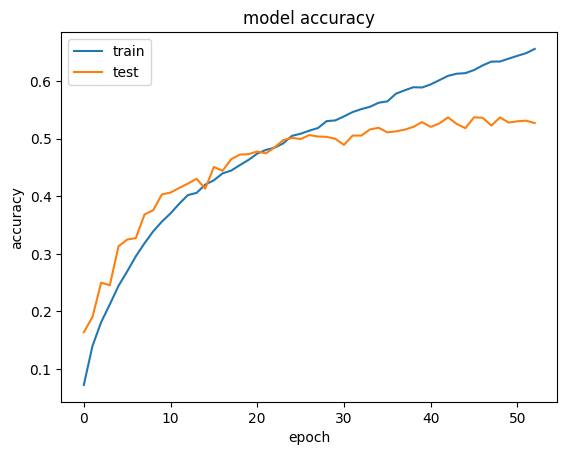

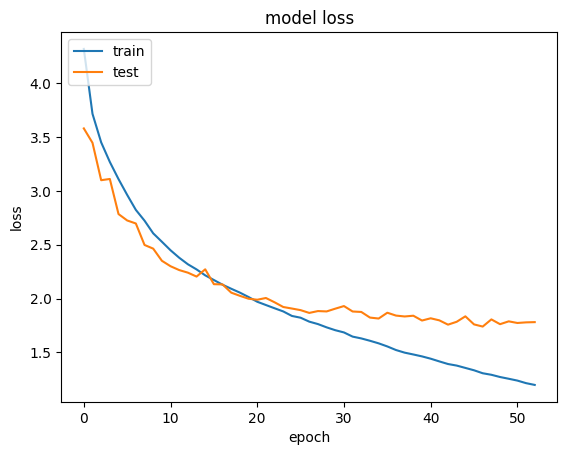

In [8]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
def build_model(dropout_rate, learning_rate):
    model = Sequential()

    model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(32, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(64, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(N_CLASSES, activation='softmax'))
    
    optim = SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

    return model

In [10]:
def plot_training_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(f"{title}.png")
    plt.show()

In [11]:
BATCH_SIZES = [32, 64, 128]


Testing Batch Size=32, Dropout=0.5, LR=0.001
Run 1/3
 Test Accuracy: 0.5406


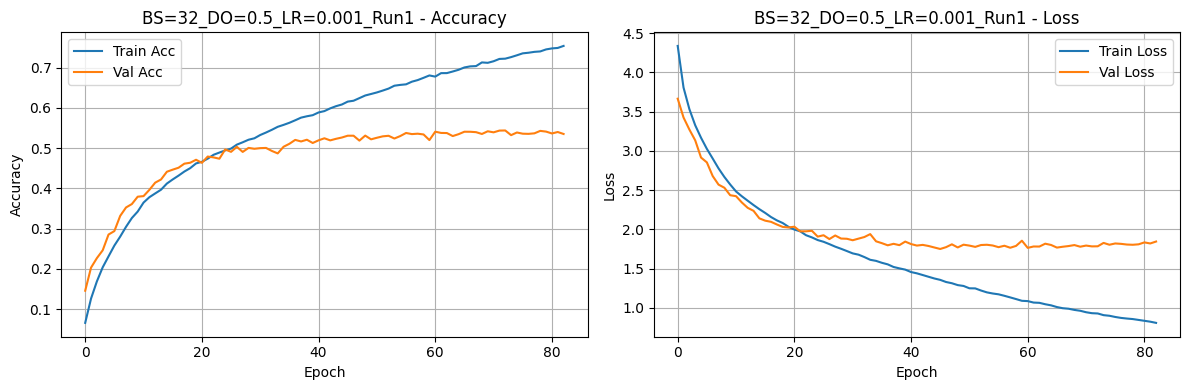

Run 2/3
 Test Accuracy: 0.5452


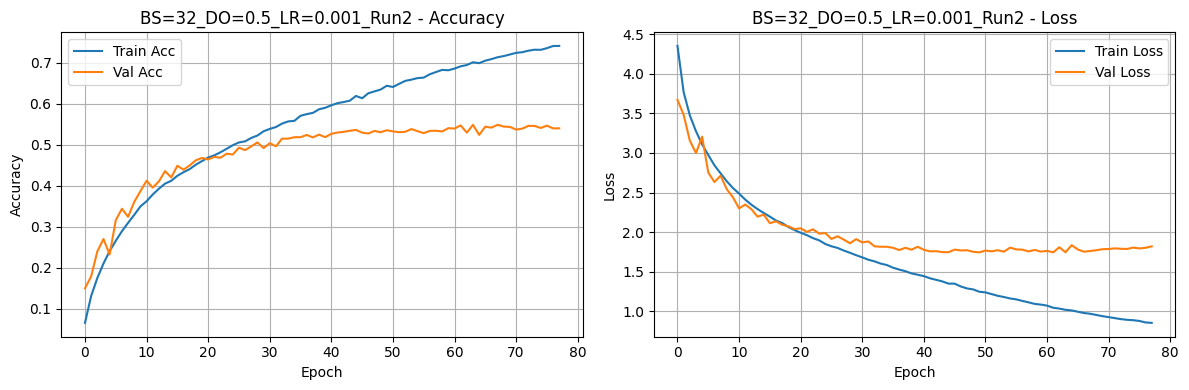

Run 3/3
 Test Accuracy: 0.5455


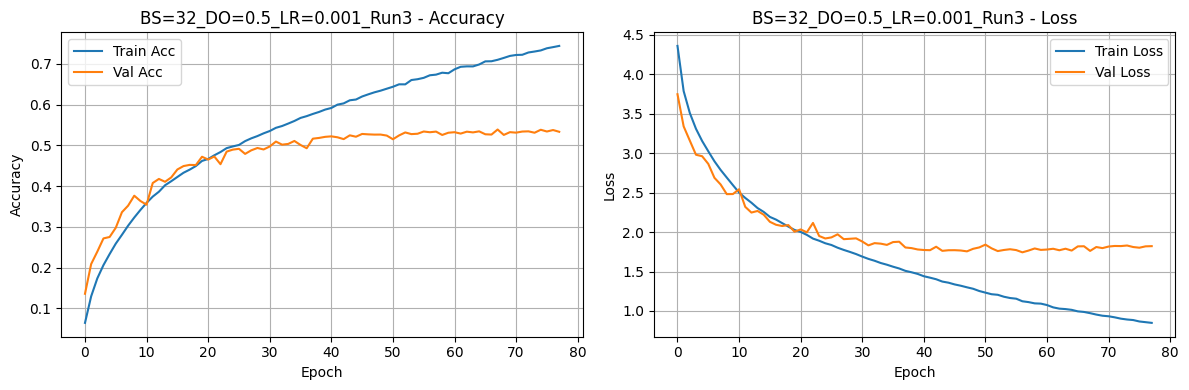


Testing Batch Size=64, Dropout=0.5, LR=0.001
Run 1/3
 Test Accuracy: 0.5329


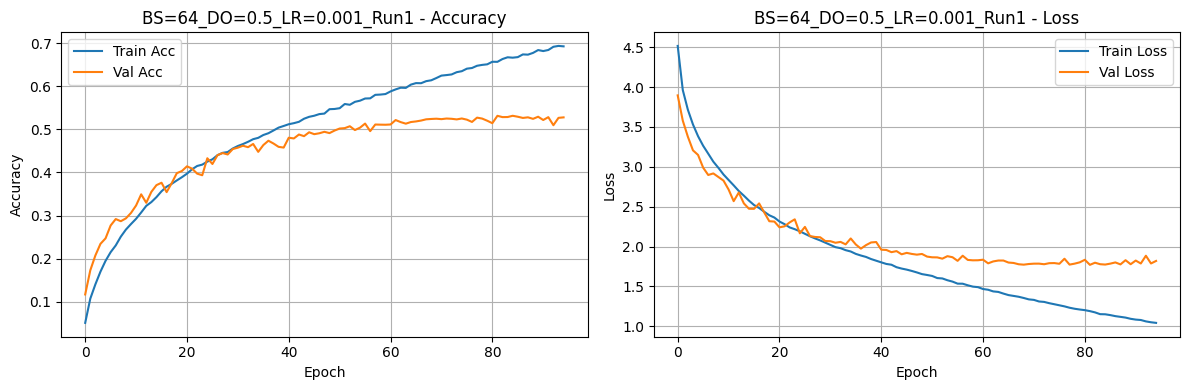

Run 2/3
 Test Accuracy: 0.5405


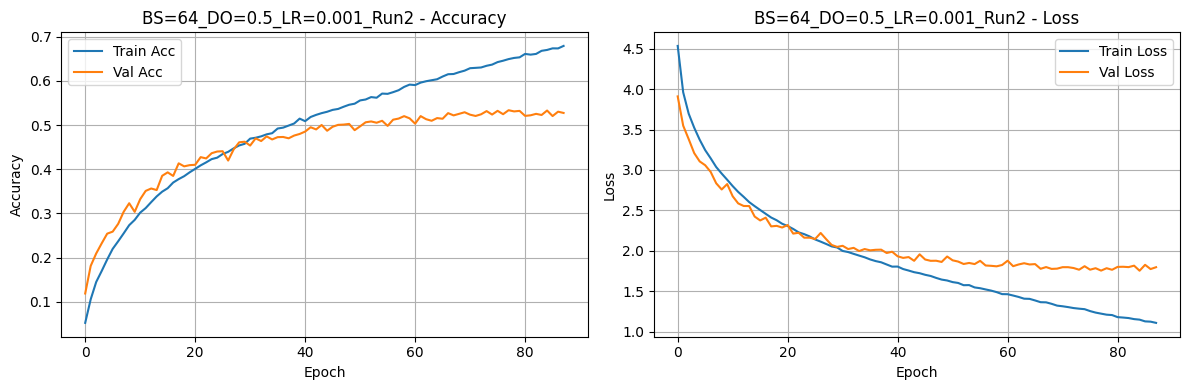

Run 3/3
 Test Accuracy: 0.5376


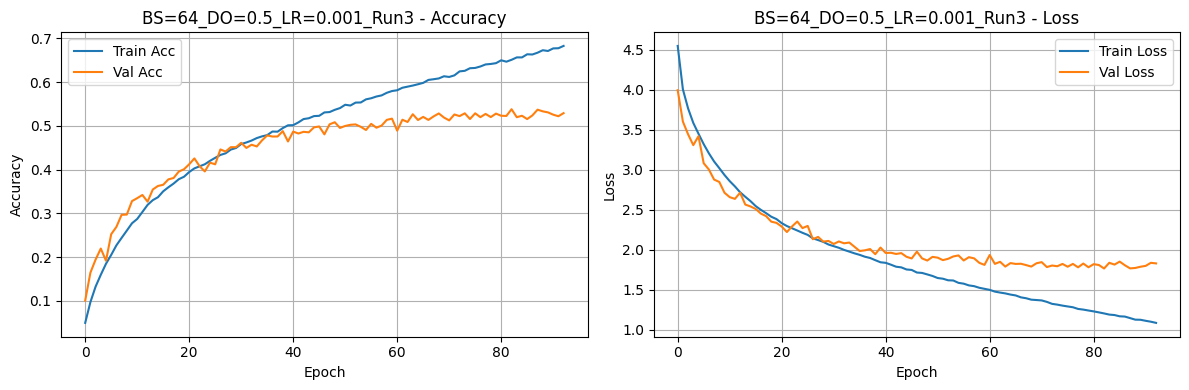


Testing Batch Size=128, Dropout=0.5, LR=0.001
Run 1/3
 Test Accuracy: 0.5206


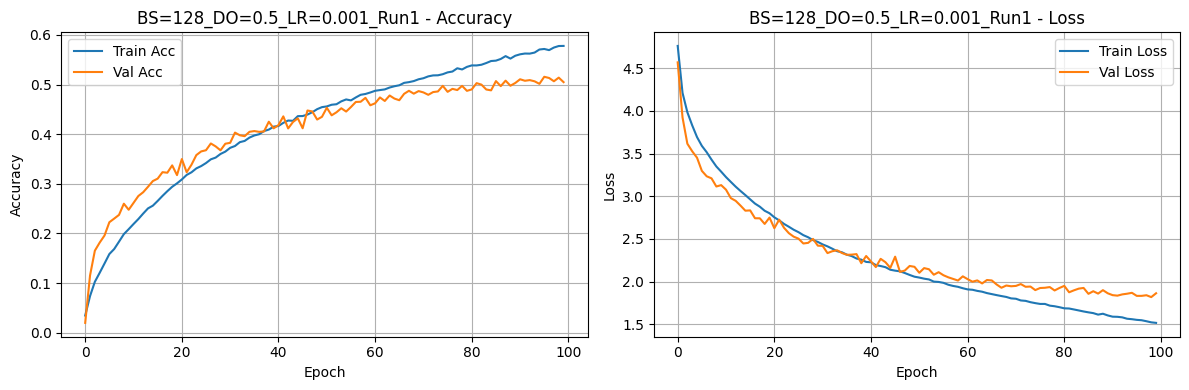

Run 2/3
 Test Accuracy: 0.5184


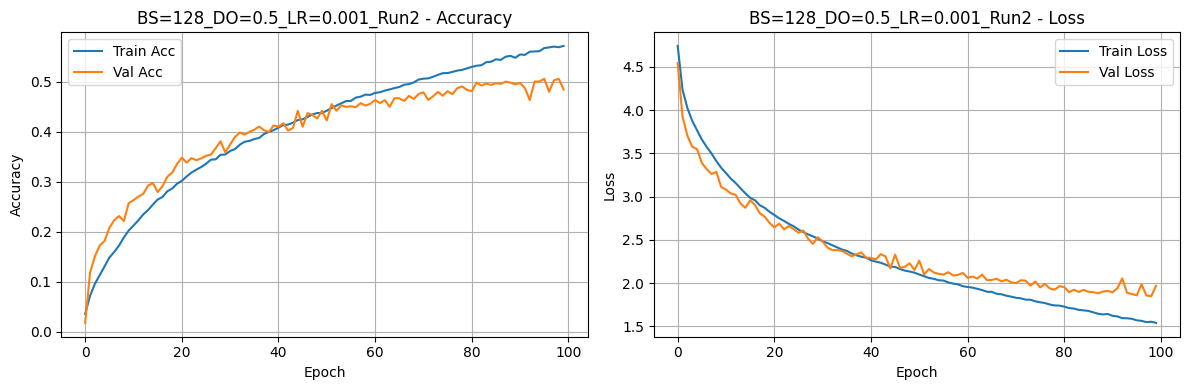

Run 3/3
 Test Accuracy: 0.5091


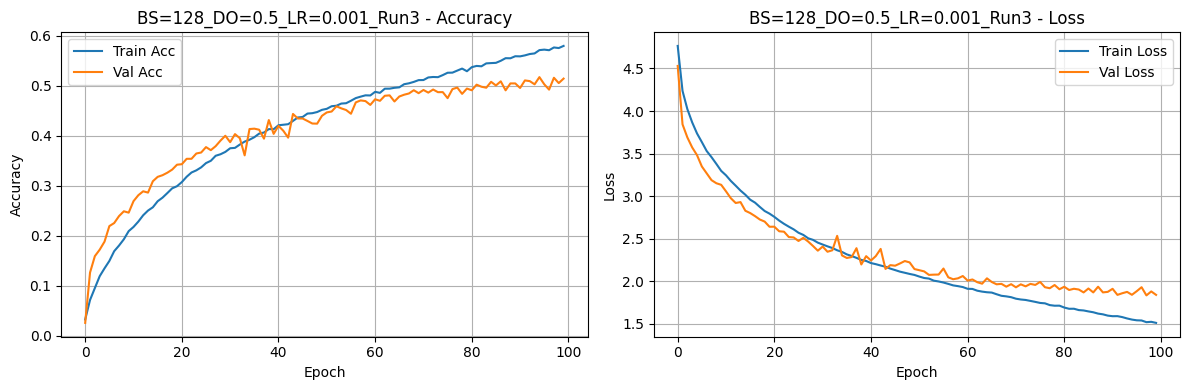

In [12]:
batch_size_results = []

for batch_size in BATCH_SIZES:
    print(f"\nTesting Batch Size={batch_size}, Dropout={DROPOUT}, LR={LEARNING_RATE}")
    
    val_accs, test_accs = [], []

    for run in range(1, 4):  
        print(f"Run {run}/3")
        model = build_model(dropout_rate=DROPOUT, learning_rate=LEARNING_RATE)
        early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

        history = model.fit(
            input_X_train, output_Y_train,
            batch_size=batch_size,
            epochs=N_EPOCH,
            validation_split=VALIDATION_SPLIT,
            verbose=VERBOSE,
            callbacks=[early_stopping]
        )

        test_loss, test_acc = model.evaluate(input_X_test, output_Y_test, batch_size=batch_size, verbose=VERBOSE)
        print(f" Test Accuracy: {test_acc:.4f}")

        val_accs.append(max(history.history['val_accuracy']))
        test_accs.append(test_acc)

        title = f"BS={batch_size}_DO={DROPOUT}_LR={LEARNING_RATE}_Run{run}"
        plot_training_history(history, title)

    batch_size_results.append({
        'Batch Size': batch_size,
        'Dropout': DROPOUT,
        'Learning Rate': LEARNING_RATE,
        'Avg Val Accuracy': np.mean(val_accs),
        'Avg Test Accuracy': np.mean(test_accs)
    })


In [13]:
batch_size_results_df = pd.DataFrame(batch_size_results)
batch_size_results_df = batch_size_results_df.sort_values(by='Batch Size')
print("\nBatch Size Results:")
print(batch_size_results_df.sort_values(by='Avg Test Accuracy', ascending=False))


Batch Size Results:
   Batch Size  Dropout  Learning Rate  Avg Val Accuracy  Avg Test Accuracy
0          32      0.5          0.001          0.543967           0.543767
1          64      0.5          0.001          0.534333           0.537000
2         128      0.5          0.001          0.512800           0.516033


In [14]:
best_batch_size = batch_size_results_df.loc[batch_size_results_df['Avg Test Accuracy'].idxmax()]
print("\nBest Batch Size:")
print(best_batch_size)


Best Batch Size:
Batch Size           32.000000
Dropout               0.500000
Learning Rate         0.001000
Avg Val Accuracy      0.543967
Avg Test Accuracy     0.543767
Name: 0, dtype: float64


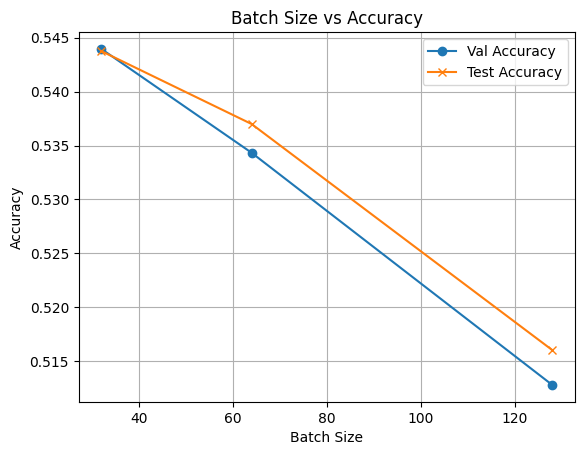

In [15]:
plt.plot(batch_size_results_df['Batch Size'], batch_size_results_df['Avg Val Accuracy'], marker='o', label='Val Accuracy')
plt.plot(batch_size_results_df['Batch Size'], batch_size_results_df['Avg Test Accuracy'], marker='x', label='Test Accuracy')
plt.title('Batch Size vs Accuracy')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
LEARNING_RATES = [0.01, 0.005, 0.001]


Testing Learning Rate = 0.01, Batch Size = 32, Dropout = 0.5
 Run 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 Test Accuracy: 0.5341


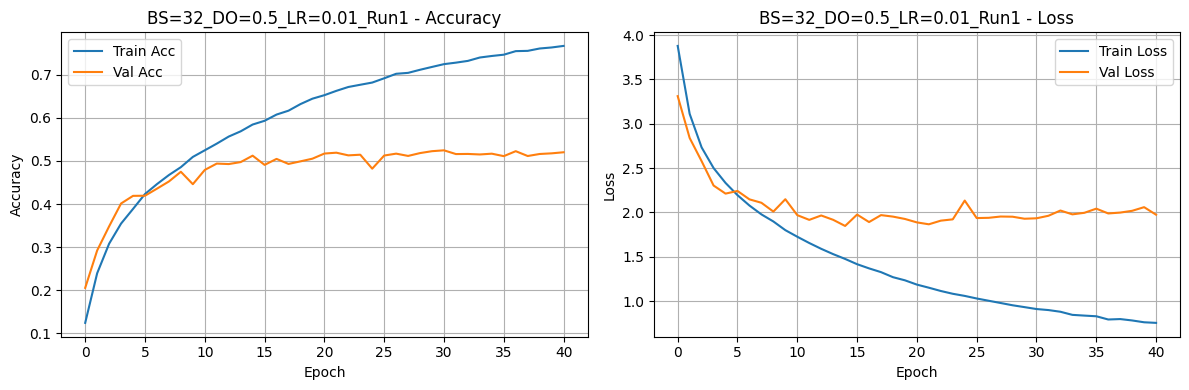

 Run 2/3
 Test Accuracy: 0.5289


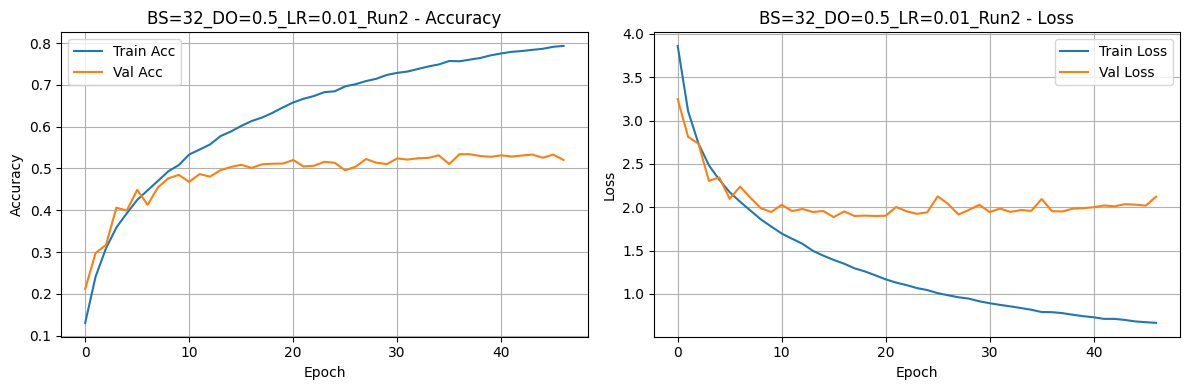

 Run 3/3
 Test Accuracy: 0.5188


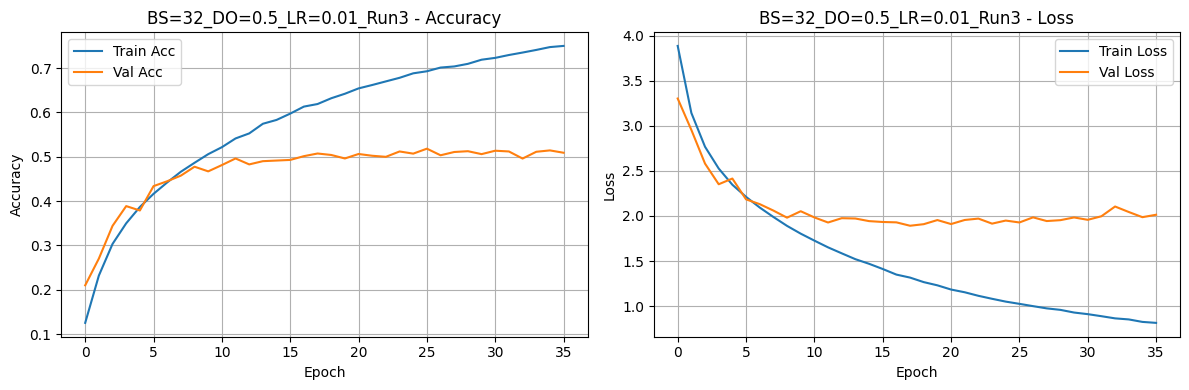


Testing Learning Rate = 0.005, Batch Size = 32, Dropout = 0.5
 Run 1/3
 Test Accuracy: 0.5274


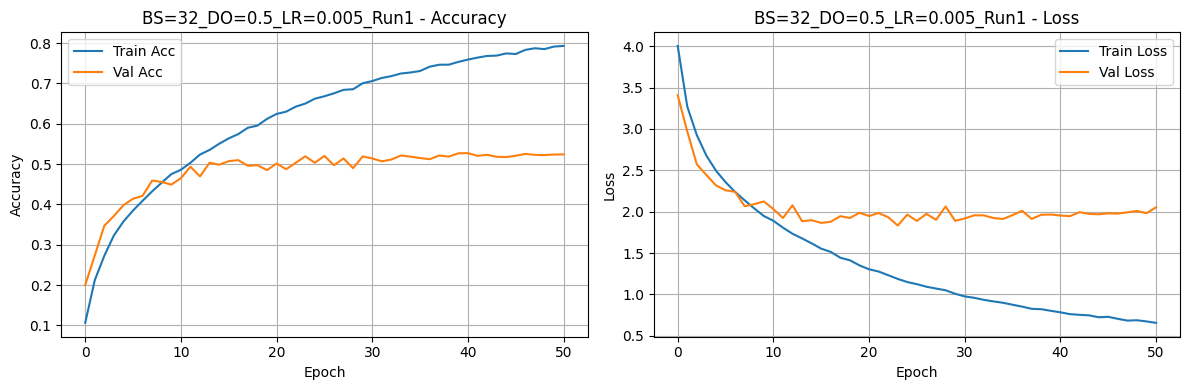

 Run 2/3
 Test Accuracy: 0.5316


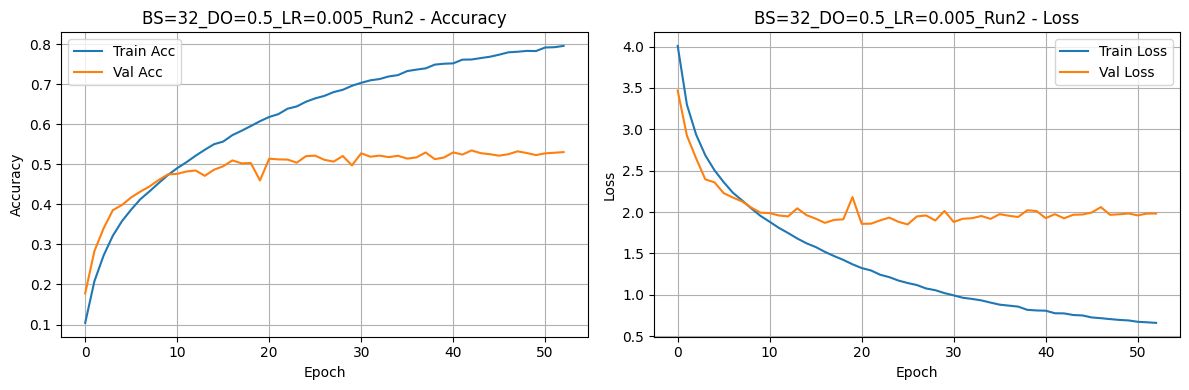

 Run 3/3
 Test Accuracy: 0.5329


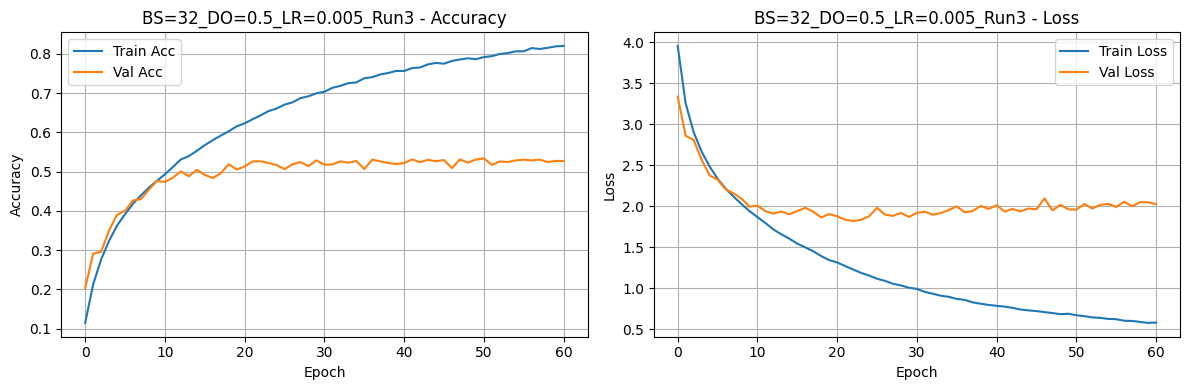


Testing Learning Rate = 0.001, Batch Size = 32, Dropout = 0.5
 Run 1/3
 Test Accuracy: 0.5360


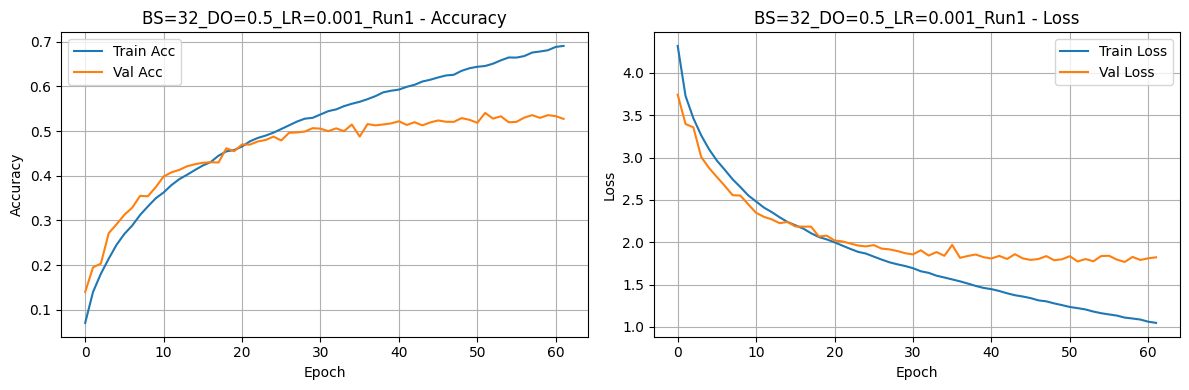

 Run 2/3
 Test Accuracy: 0.5408


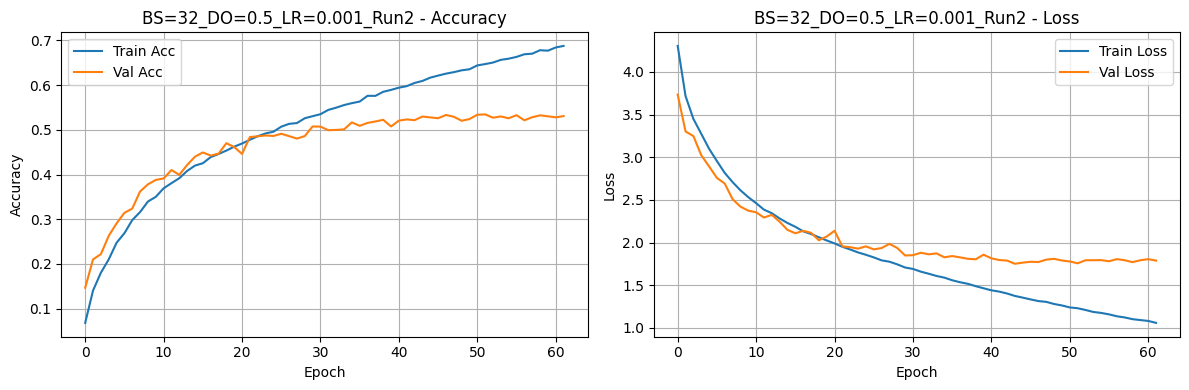

 Run 3/3
 Test Accuracy: 0.5465


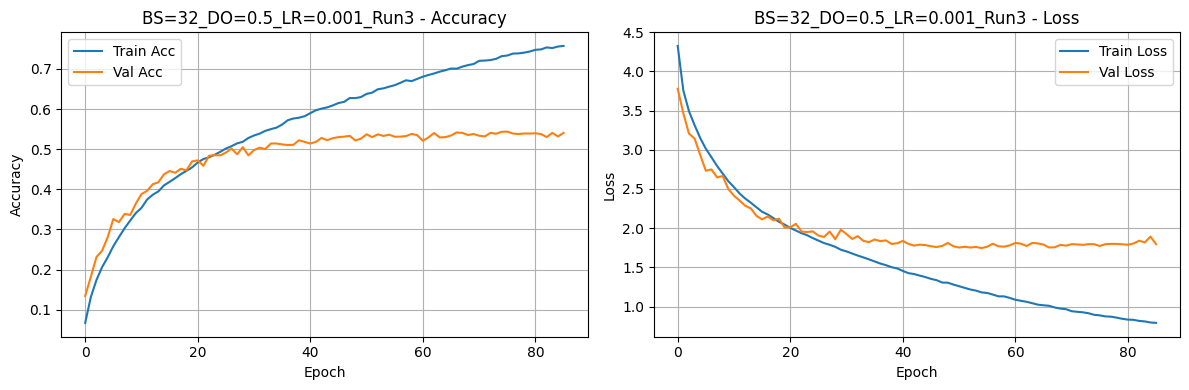

In [17]:
learning_rate_results = []

for lr in LEARNING_RATES:
    print(f"\nTesting Learning Rate = {lr}, Batch Size = {BATCH_SIZE}, Dropout = {DROPOUT}")

    val_accs, test_accs = [], []

    for run in range(1, 4):  
        print(f" Run {run}/3")

        model = build_model(dropout_rate=DROPOUT, learning_rate=lr)
        early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

        history = model.fit(
            input_X_train, output_Y_train,
            batch_size=BATCH_SIZE,
            epochs=N_EPOCH,
            validation_split=VALIDATION_SPLIT,
            verbose=VERBOSE,
            callbacks=[early_stopping]
        )

        test_loss, test_acc = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
        print(f" Test Accuracy: {test_acc:.4f}")

        val_accs.append(max(history.history['val_accuracy']))
        test_accs.append(test_acc)

        title = f"BS={BATCH_SIZE}_DO={DROPOUT}_LR={lr}_Run{run}"
        plot_training_history(history, title)

    learning_rate_results.append({
        'Batch Size': BATCH_SIZE,
        'Dropout': DROPOUT,
        'Learning Rate': lr,
        'Avg Val Accuracy': np.mean(val_accs),
        'Avg Test Accuracy': np.mean(test_accs)
    })


In [18]:
learning_rate_results_df = pd.DataFrame(learning_rate_results)
learning_rate_results_df = learning_rate_results_df.sort_values(by='Learning Rate')

print("\nLearning Rate Results:")
print(learning_rate_results_df.sort_values(by='Avg Test Accuracy', ascending=False))


Learning Rate Results:
   Batch Size  Dropout  Learning Rate  Avg Val Accuracy  Avg Test Accuracy
2          32      0.5          0.001          0.539500           0.541100
1          32      0.5          0.005          0.531933           0.530633
0          32      0.5          0.010          0.525700           0.527267


In [19]:
best_learning_rate = learning_rate_results_df.loc[learning_rate_results_df['Avg Test Accuracy'].idxmax()]
print("\nBest Learning Rate:")
print(best_learning_rate)


Best Learning Rate:
Batch Size           32.0000
Dropout               0.5000
Learning Rate         0.0010
Avg Val Accuracy      0.5395
Avg Test Accuracy     0.5411
Name: 2, dtype: float64


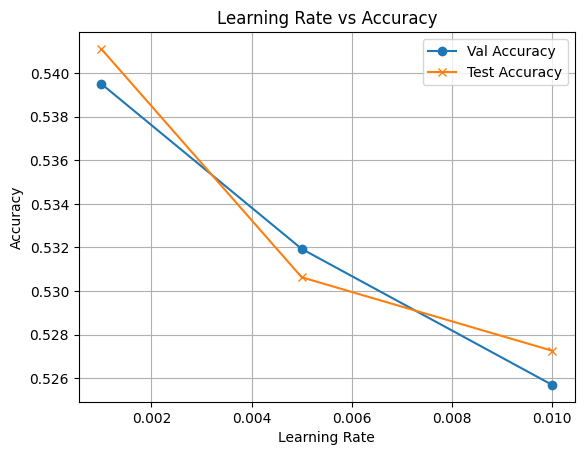

In [20]:
plt.plot(learning_rate_results_df['Learning Rate'], learning_rate_results_df['Avg Val Accuracy'], marker='o', label='Val Accuracy')
plt.plot(learning_rate_results_df['Learning Rate'], learning_rate_results_df['Avg Test Accuracy'], marker='x', label='Test Accuracy')
plt.title('Learning Rate vs Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
DROPOUTS = [0.5, 0.6, 0.7]


Testing Dropout = 0.5, Batch Size = 32, LR = 0.001
Run 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.5419


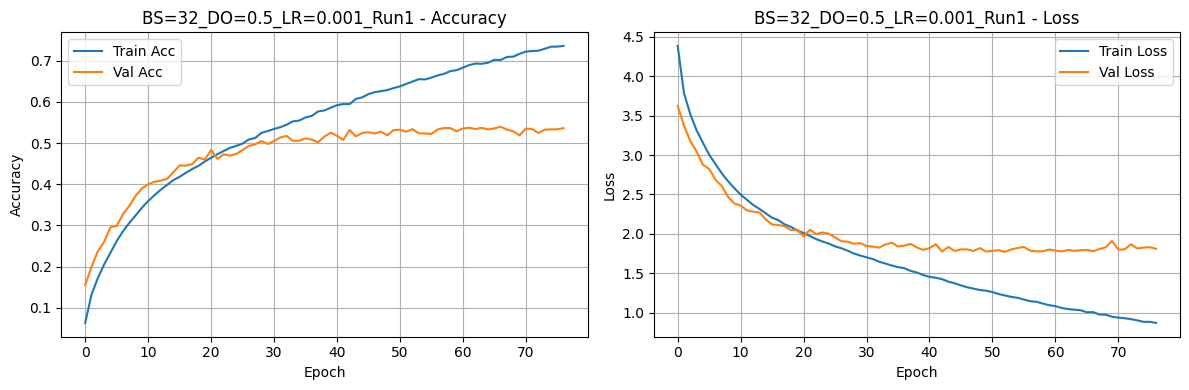

Run 2/3
Test Accuracy: 0.5376


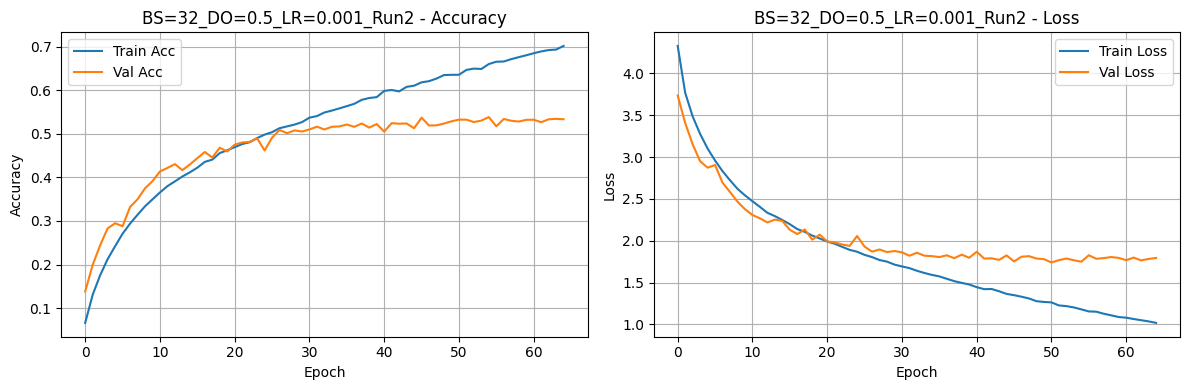

Run 3/3
Test Accuracy: 0.5412


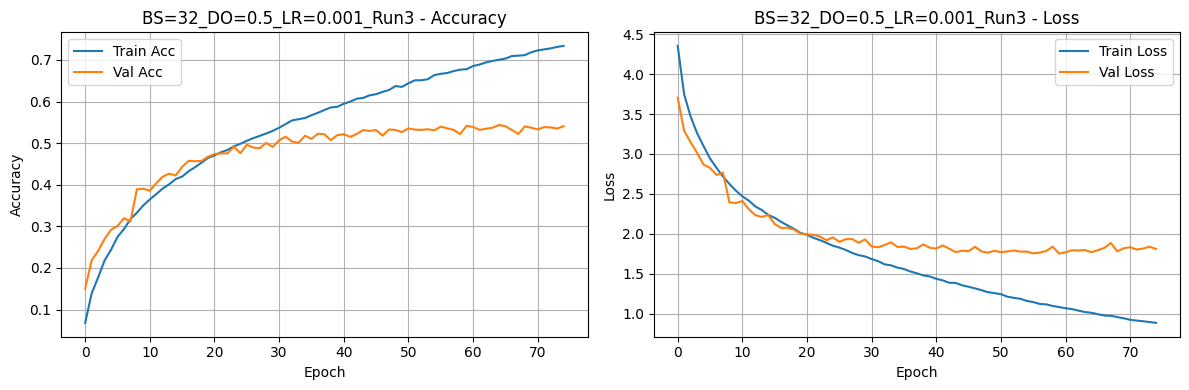


Testing Dropout = 0.6, Batch Size = 32, LR = 0.001
Run 1/3
Test Accuracy: 0.5428


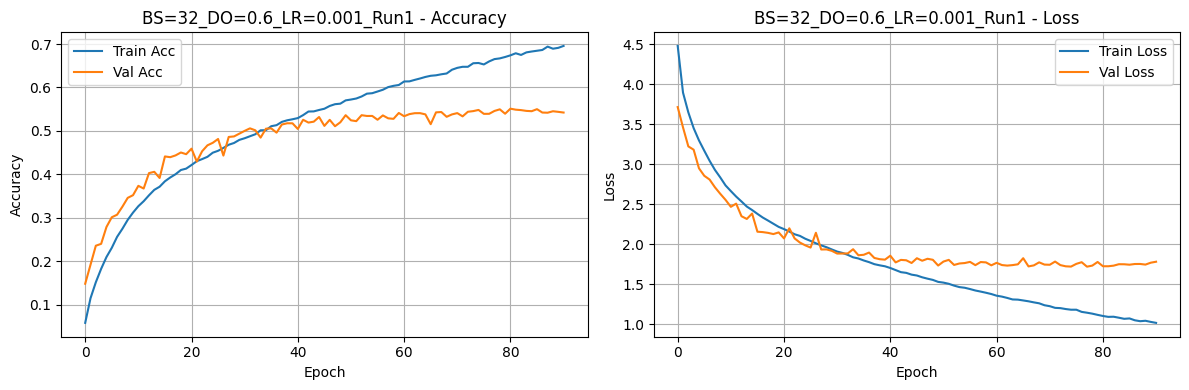

Run 2/3
Test Accuracy: 0.5435


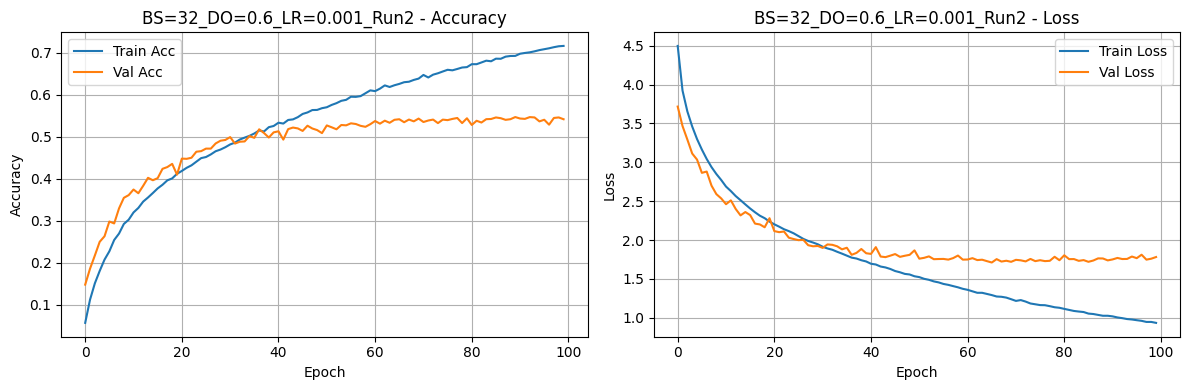

Run 3/3
Test Accuracy: 0.5432


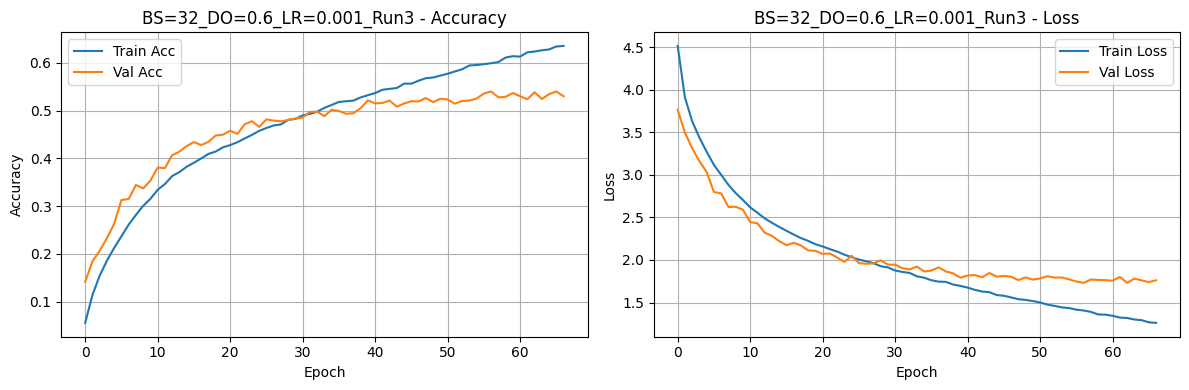


Testing Dropout = 0.7, Batch Size = 32, LR = 0.001
Run 1/3
Test Accuracy: 0.5178


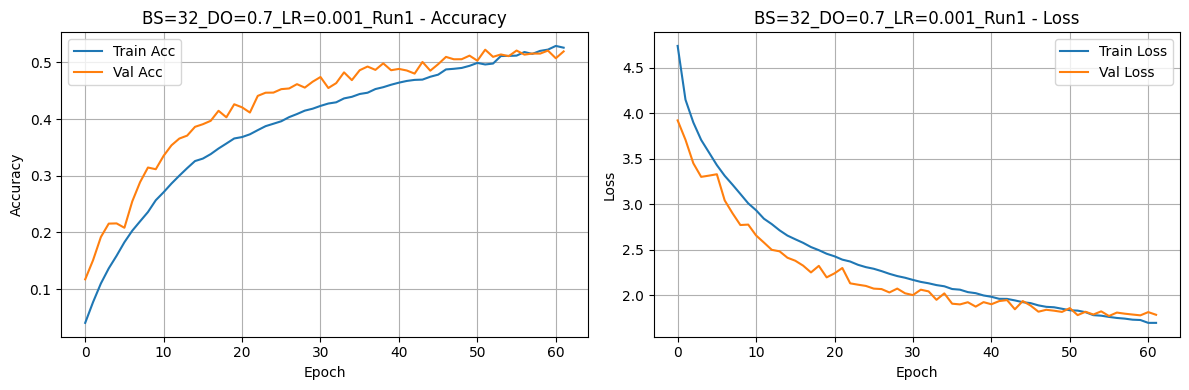

Run 2/3
Test Accuracy: 0.5388


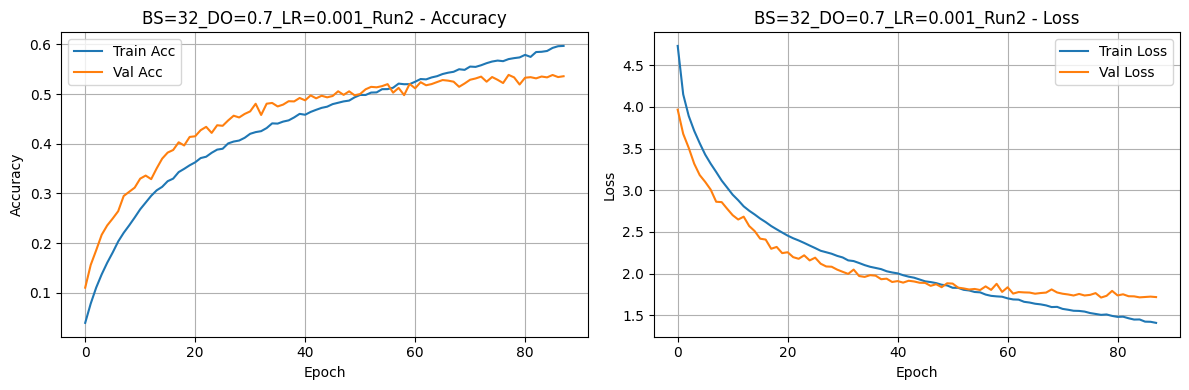

Run 3/3
Test Accuracy: 0.5495


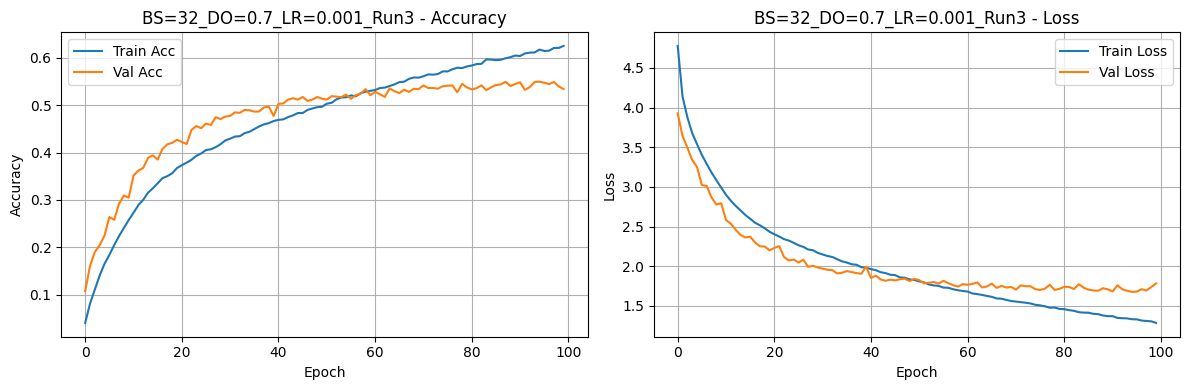

In [22]:
dropout_results = []

for dropout in DROPOUTS:
    print(f"\nTesting Dropout = {dropout}, Batch Size = {BATCH_SIZE}, LR = {LEARNING_RATE}")

    val_accs, test_accs = [], []

    for run in range(1, 4):
        print(f"Run {run}/3")

        model = build_model(dropout_rate=dropout, learning_rate=LEARNING_RATE)
        early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

        history = model.fit(
            input_X_train, output_Y_train,
            batch_size=BATCH_SIZE,
            epochs=N_EPOCH,
            validation_split=VALIDATION_SPLIT,
            verbose=VERBOSE,
            callbacks=[early_stopping]
        )

        test_loss, test_acc = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
        print(f"Test Accuracy: {test_acc:.4f}")

        val_accs.append(max(history.history['val_accuracy']))
        test_accs.append(test_acc)

        title = f"BS={BATCH_SIZE}_DO={dropout}_LR={LEARNING_RATE}_Run{run}"
        plot_training_history(history, title)

    dropout_results.append({
        'Batch Size': BATCH_SIZE,
        'Dropout': dropout,
        'Learning Rate': LEARNING_RATE,
        'Avg Val Accuracy': np.mean(val_accs),
        'Avg Test Accuracy': np.mean(test_accs)
    })


In [23]:
dropout_results_df = pd.DataFrame(dropout_results)
dropout_results_df = dropout_results_df.sort_values(by='Dropout')

print("\nDropout Results:")
print(dropout_results_df.sort_values(by='Avg Test Accuracy', ascending=False))


Dropout Results:
   Batch Size  Dropout  Learning Rate  Avg Val Accuracy  Avg Test Accuracy
1          32      0.6          0.001          0.546133           0.543167
0          32      0.5          0.001          0.540533           0.540233
2          32      0.7          0.001          0.536833           0.535367


In [24]:
best_dropout = dropout_results_df.loc[dropout_results_df['Avg Test Accuracy'].idxmax()]
print("\nBest Dropout Rate:")
print(best_dropout)


Best Dropout Rate:
Batch Size           32.000000
Dropout               0.600000
Learning Rate         0.001000
Avg Val Accuracy      0.546133
Avg Test Accuracy     0.543167
Name: 1, dtype: float64


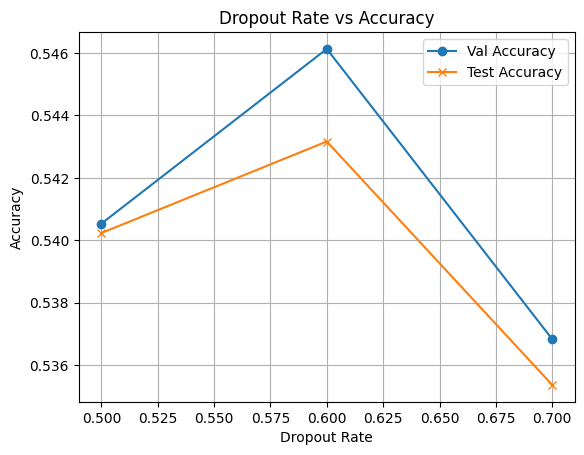

In [25]:
plt.plot(dropout_results_df['Dropout'], dropout_results_df['Avg Val Accuracy'], marker='o', label='Val Accuracy')
plt.plot(dropout_results_df['Dropout'], dropout_results_df['Avg Test Accuracy'], marker='x', label='Test Accuracy')
plt.title('Dropout Rate vs Accuracy')
plt.xlabel('Dropout Rate')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()